### Ch17 Figure3

In [1]:
# The data showed that when students used the software their scores would get better.

data = []

for i in range(5000):
    
    if rd.random() <= .6:
        use_software = 1
    else:
        use_software = 0
    
    if use_software == 1:
        if rd.random() <= .6:
            grade = rd.randint(3,4)
        else:
            grade = rd.randint(1,2)
    else:
        if rd.random() <= .1:
            grade = 4
        else:
            grade = rd.randint(1,3)
    data.append([i, use_software, grade])

df = pd.DataFrame(data, columns=['id', 'use_software', 'grade'])
# df.to_csv('csv_output/ch17_fig3.csv', index=False)
df = pd.read_csv('csv_output/ch17_fig3.csv')
df.head()

,id,use_software,grade
0,0,1,2
1,1,0,1
2,2,1,1
3,3,1,4
4,4,1,1


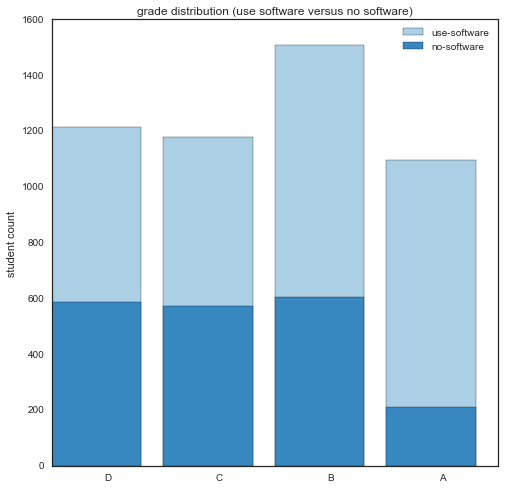

In [2]:
df = pd.read_csv('csv_output/ch17_fig3.csv')

%matplotlib inline
sns.set_style("white")
cm = sns.color_palette('Blues', 2)

f, ax = plt.subplots(1,1, figsize=(8,8))

dgb = df.groupby(['use_software', 'grade']).count().reset_index()
total = np.bincount(df['grade'])[1:]
ax.bar(left= np.arange(4), height=total, color=cm[0]);
series = total - dgb[dgb['use_software'] == 1]['id'].values
ax.bar(left= np.arange(4), height=series, color=cm[1]);

ax.legend(['use-software', 'no-software']);
ax.set_title('grade distribution (use software versus no software)')
ax.set_xticks(np.arange(4)+.5);
ax.set_xticklabels(['D','C','B','A']);
ax.set_ylabel('student count')

f.savefig('svg_output/ch17_fig3.svg', format='svg')

Looking at the total distribution, most students got B, and least students got A. However, if we look at student using-software versus not, for students that receive C or D, it's almost 50-50 chance, but for those that receive B and especially A, more of them used software.